## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a better understanding of what factors matter to the sales and improve the forthcoming sales strategy. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018 across 48 states in the US. Some state have full 4-year records but others have records of 1 or 2 years only.
***

### Objective

In this project, we challenge ourselves: can we predict the profit in one of the states using the Superstore’s sales data?  

The aim is to analyze historical data and build a predictive model. More importantly, we want to explore which information is more useful to drive the growth of the profit. 

 - To explore, organize and analyze the data,  and make sure it's well defined
 - To identify features that significantly affect the sales
 - To develop different machine learning models that predict the sales
 - To assess the model performance and select the best model
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))

The dataset contains: 9994 customers and 21 features.


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 3. Data Cleaning 

In [6]:
# Check null/missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 - Data is very clean and no missing value is observed.

In [7]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [8]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
# df['City'].value_counts()
df['City'].nunique()

531

In [10]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [11]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
df[df['Category'] == 'Furniture'][df[df['Category'] == 'Furniture']['Profit']<0].sort_values('Profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9639,9640,CA-2015-116638,1/28/2015,1/31/2015,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
5320,5321,US-2017-162558,10/2/2017,10/5/2017,First Class,Dp-13240,Dean percer,Home Office,United States,Knoxville,...,37918,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2314.116,7,0.4,-1002.7836
8993,8994,CA-2017-159100,10/16/2017,10/21/2017,Standard Class,VP-21760,Victoria Pisteka,Corporate,United States,Columbia,...,38401,South,FUR-TA-10001950,Furniture,Tables,Balt Solid Wood Round Tables,1875.258,7,0.4,-968.8833
463,464,CA-2016-109869,4/22/2016,4/29/2016,Standard Class,TN-21040,Tanja Norvell,Home Office,United States,Phoenix,...,85023,West,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.630,6,0.5,-814.4832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,1710,CA-2017-123491,10/30/2017,11/5/2017,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,94122,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",71.992,1,0.2,-0.8999
4739,4740,CA-2015-105725,2/18/2015,2/24/2015,Standard Class,GT-14755,Guy Thornton,Consumer,United States,Long Beach,...,90805,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,35.544,1,0.2,-0.8886
8561,8562,CA-2016-132829,12/23/2016,12/26/2016,Second Class,LA-16780,Laura Armstrong,Corporate,United States,Houston,...,77041,Central,FUR-FU-10000206,Furniture,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2.328,2,0.6,-0.7566
1106,1107,US-2016-110156,11/19/2016,11/24/2016,Standard Class,EH-13945,Eric Hoffmann,Consumer,United States,Houston,...,77041,Central,FUR-FU-10000206,Furniture,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2.328,2,0.6,-0.7566


In [13]:
df_neg_profit = df[df['Profit']<0].sort_values('Profit')

In [14]:
df_neg_profit.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
683,684,US-2017-168116,11/4/2017,11/4/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9774,9775,CA-2014-169019,7/26/2014,7/30/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3011,3012,CA-2017-134845,4/17/2017,4/23/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4991,4992,US-2017-122714,12/7/2017,12/13/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845


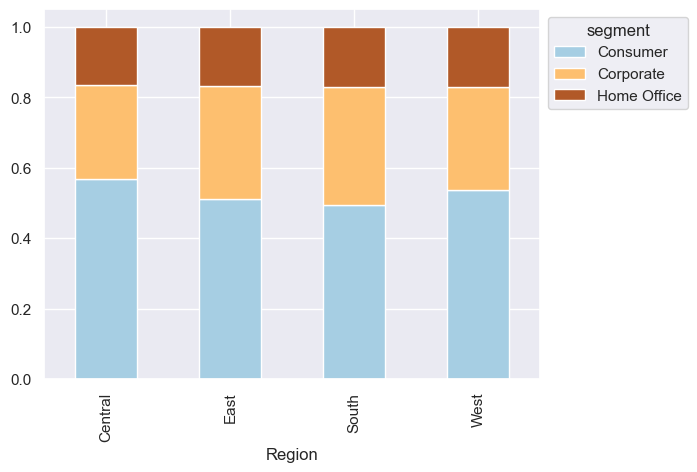

In [15]:
by_neg_profit = df_neg_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_neg_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

In [16]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [17]:
# remove undesired rows/columns
To_Drop = ['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Sub-Category','Country', 'City', 'Postal Code']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', and 'Product ID' were dropped because I think they don't provide much predictive power.
 - 'Product Name' and 'Sub-Category' were dropped as 'Category' has the same information in more general way.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'City' was dropped, as there are too many individual cities to be accounted for, and it is similar to the information in 'State' and 'Region'.
 - 'Postal Code' was dropped.

## 4. Feature Engineering

 - **'Order Date' and 'Ship Date' are converted to 'datetime' objects instead of objects.**

In [18]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [19]:
# generate a new column about the time between order and shipping to gain more information on the date
df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [20]:
df['Sale_Year'] = df['Order Date'].dt.year

In [21]:
# drop columns
df_clean = df.drop(columns=['Order Date', 'Ship Date'], axis=1)

In [22]:
# sort
df_clean = df_clean.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

In [23]:
df_clean.head()

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days,Sale_Year
2697,Standard Class,Home Office,Florida,South,Technology,22638.480,6,0.5,-1811.0784,5,2014
6826,Standard Class,Corporate,Indiana,Central,Technology,17499.950,5,0.0,8399.9760,7,2016
8153,First Class,Consumer,Washington,West,Technology,13999.960,4,0.0,6719.9808,2,2017
2623,First Class,Home Office,New York,East,Technology,11199.968,4,0.2,3919.9888,2,2017
4190,Standard Class,Consumer,Delaware,East,Technology,10499.970,3,0.0,5039.9856,5,2017


## 5. EDA

### 5.1  Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

#### Number of distinct regions and states

In [24]:
#Select the 'Region' and 'state' columns from data and use the `nunique` method to calculate
#the number of unique values in each
df[['Region', 'State']].nunique()

Region     4
State     49
dtype: int64

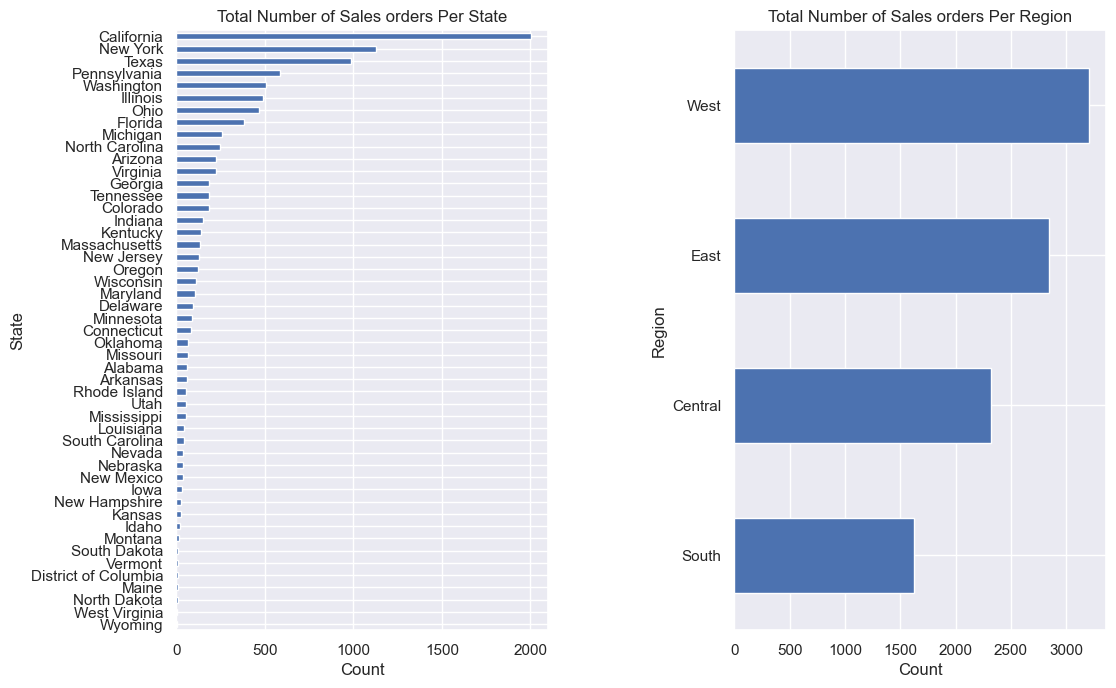

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('Count')
ax[0].set_title('Total Number of Sales orders Per State')

df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[1])
ax[1].set_ylabel('Region')
ax[1].set_xlabel('Count')
ax[1].set_title('Total Number of Sales orders Per Region')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0)
plt.savefig('images/total_orders.png')
plt.show();


- Looking at the distribution of States, we can see that California (West), New York (East) and Texas (Central) accounting for the majority of orders. The target in this project is Texas which comes in at the 3rd place.

#### Distribution of average numeric variables per state

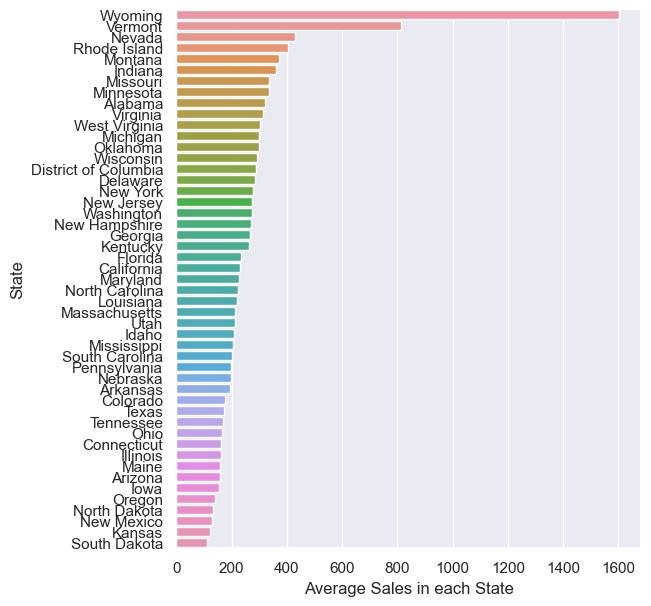

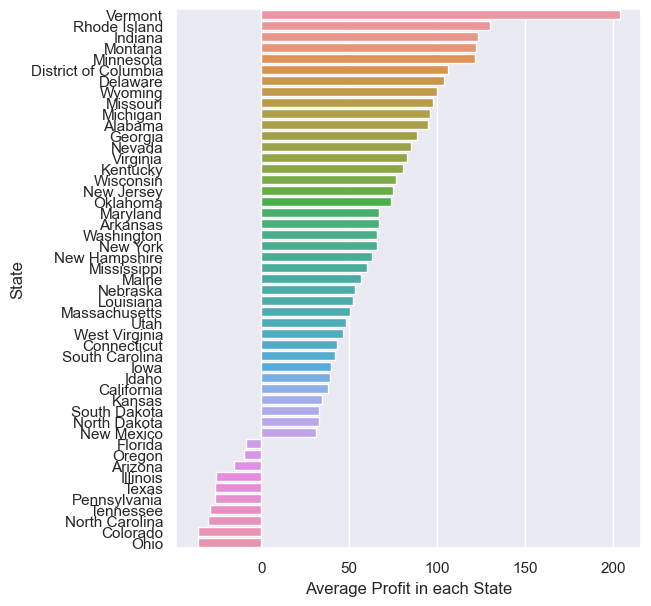

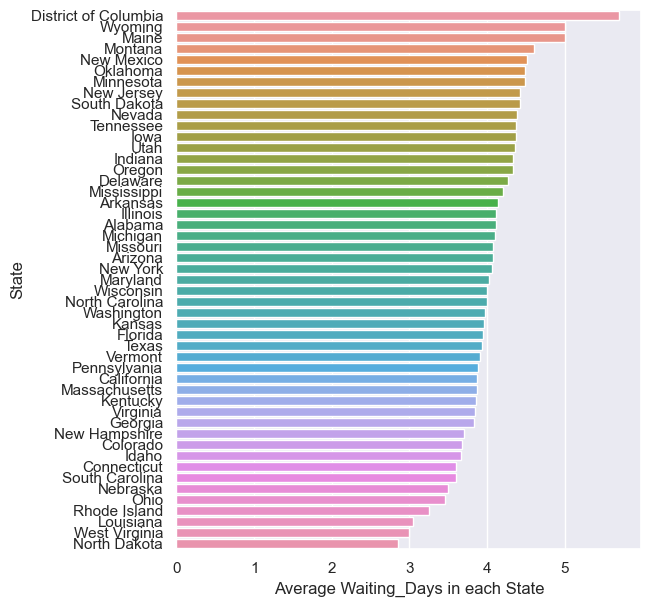

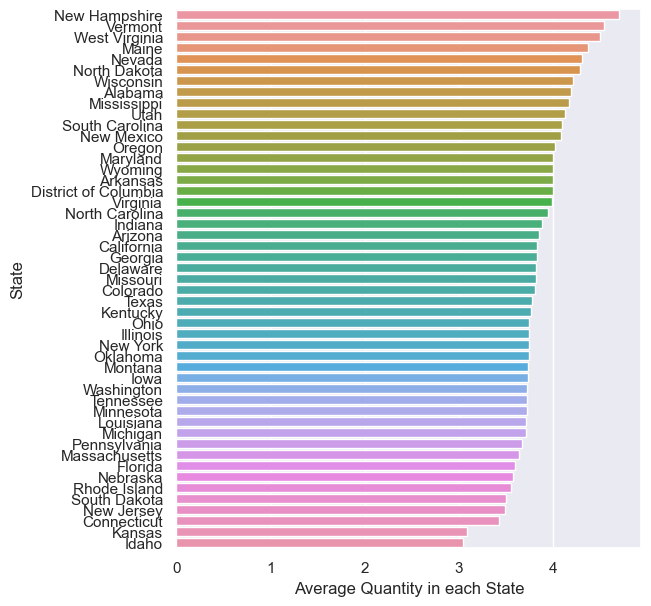

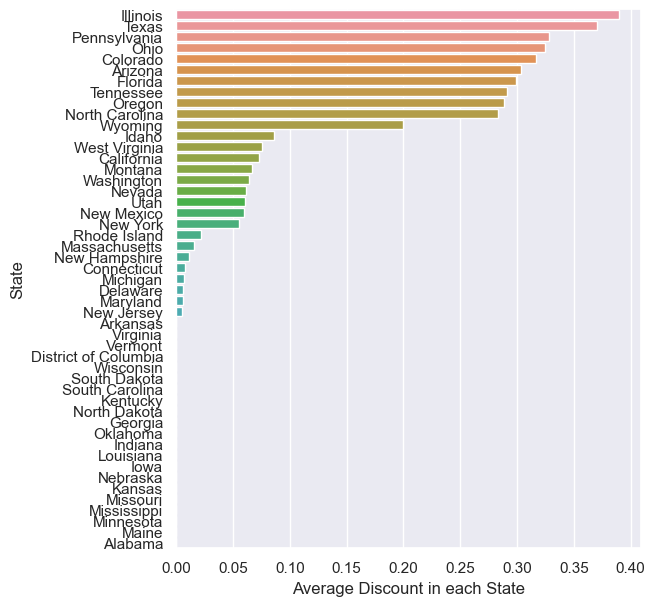

In [26]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit','Waiting_Days', 'Quantity', 'Discount']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,7))
    mean_df = df.groupby(by=['State'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=mean_df.index, x=mean_df, ax=ax)
    ax.set_xlabel(f'Average {col} in each State') 
    ax.set_ylabel('State')
    plt.savefig('images/avg_num.png')
    plt.show();

In [27]:
# aggregations to have a top-level view
State_sales_mean = df_clean.groupby(['State','Sale_Year']).mean()
State_sales_mean.sort_index(inplace=True)

State_sales_mean.tail(10)

Sales  Quantity  Discount      Profit  \
State         Sale_Year                                                
Washington    2014        317.782723  3.734043  0.065957   70.290176   
              2015        312.206853  3.666667  0.053333   71.049596   
              2016        162.412164  3.696721  0.070492   34.507178   
              2017        304.836726  3.748837  0.063256   80.264092   
West Virginia 2017        302.456000  4.500000  0.075000   46.480400   
Wisconsin     2014        403.975833  4.833333  0.000000   92.227975   
              2015        398.181429  4.476190  0.000000   97.262162   
              2016        303.127727  4.227273  0.000000   84.760877   
              2017        168.711212  3.787879  0.000000   46.153961   
Wyoming       2016       1603.136000  4.000000  0.200000  100.196000   

                         Waiting_Days  
State         Sale_Year                
Washington    2014           3.872340  
              2015           3.746667  
              2016           4.508197  
              2017           3.790698  
West Virginia 2017           3.000000  
Wisconsin     2014           3.916667  
              2015           3.571429  
              2016           4.386364  
              2017           3.787879  
Wyoming       2016           5.000000

#### Distribution of Sales

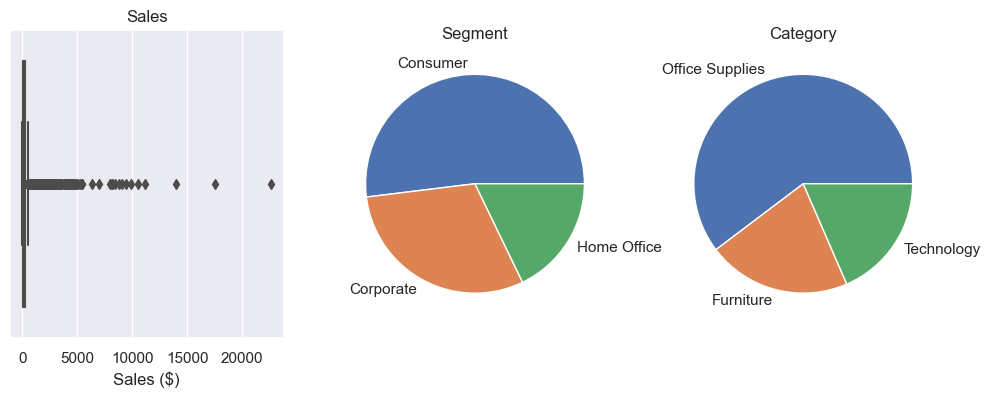

In [28]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_clean['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_clean['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_clean['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [29]:
# remove outliers
q1 = df_clean['Sales'].quantile(0.25)
q3 = df_clean['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df_clean['Sales'] >= q1 -1.5 *IQR) & (df_clean['Sales'] <= q3 + 1.5 *IQR)
df_cut = df_clean.loc[filter]
df_cut.shape

(8827, 11)

In [30]:
# remove outliers
q1 = df_cut['Profit'].quantile(0.25)
q3 = df_cut['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df_cut['Profit'] >= q1 -1.5 *IQR) & (df_cut['Profit'] <= q3 + 1.5 *IQR)
df_cut = df_cut.loc[filter]

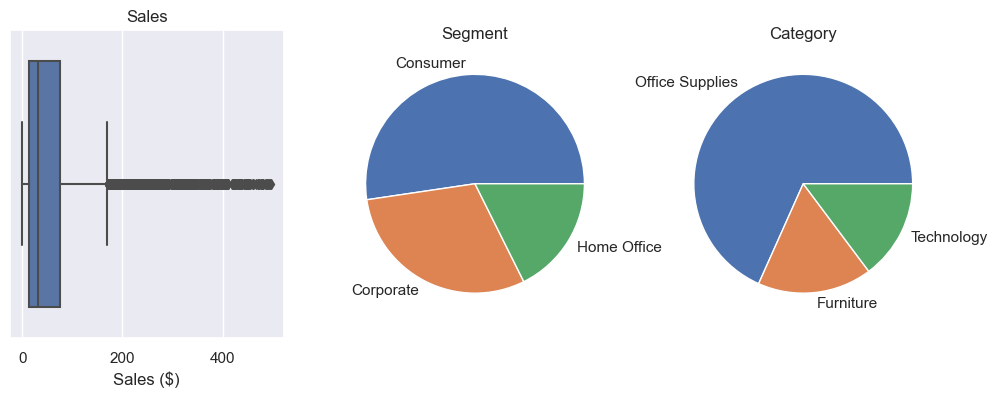

In [31]:
# plot the cleaned data
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_cut['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_cut['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_cut['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.savefig('images/pie.png')
plt.show();

In [32]:
# remove outliers in 'Profit'
q1 = df_cut['Sales'].quantile(0.25)
q3 = df_cut['Sales'].quantile(0.75)
IQR = q3- q1
Max = q3 + 1.5*IQR
print("the first quantile of sales in clean data: ${}; the third quantile of sales: ${}; IQR: {}; MAX {}".format(q1,q3, IQR, Max))

the first quantile of sales in clean data: $12.96; the third quantile of sales: $75.85; IQR: 62.88999999999999; MAX 170.185


#### total sales per state

In [33]:
# 
state_total_sales = {}
for y in df_clean.groupby('State'):
    state = y[0]
    total = sum(y[1].Sales)
    state_total_sales[state] = total

df_state_total_sales = pd.DataFrame.from_dict(state_total_sales, orient='index', columns=['total_sales'])

df_state_total_sales = df_state_total_sales.sort_values(by='total_sales', ascending=False).reset_index()
df_state_total_sales.columns = ['State', 'total_sales']
df_state_total_sales.head()

,State,total_sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


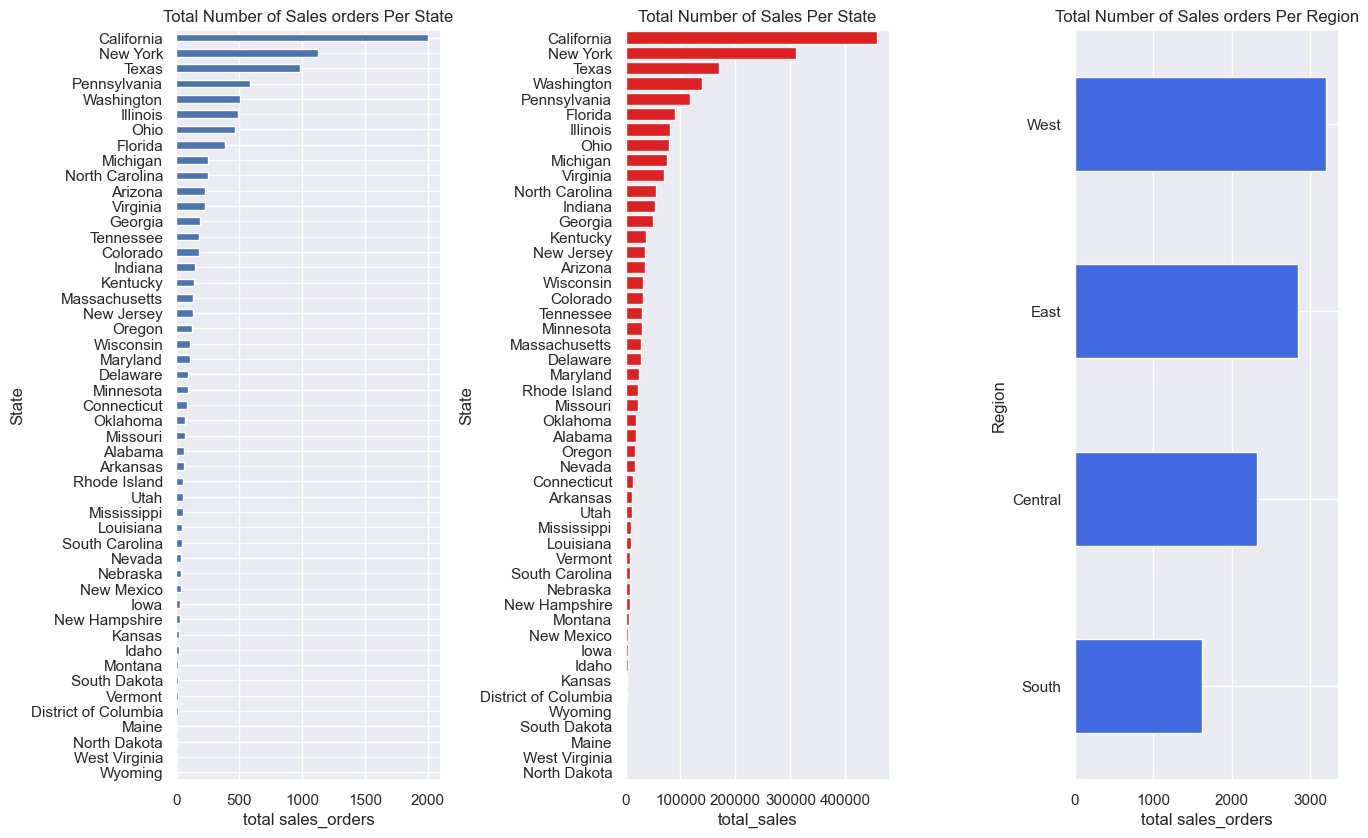

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15,15))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('total sales_orders')
ax[0].set_title('Total Number of Sales orders Per State')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.7, hspace=0)
sns.barplot(y='State', x='total_sales', data=df_state_total_sales, color='red', ax=ax[1])
ax[1].set_ylabel('State')
ax[1].set_xlabel('total_sales')
ax[1].set_title('Total Number of Sales Per State')

df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', color='royalblue', ax=ax[2])
ax[2].set_ylabel('Region')
ax[2].set_xlabel('total sales_orders')
ax[2].set_title('Total Number of Sales orders Per Region')

plt.savefig('images/total_sales.png')
plt.show();

#### total profits per state

In [35]:
state_total_profits = {}
for y in df_clean.groupby('State'):
    state = y[0]
    total = sum(y[1].Profit)
    state_total_profits[state] = total

df_state_total_profits = pd.DataFrame.from_dict(state_total_profits, orient='index', columns=['total_profits'])

df_state_total_profits = df_state_total_profits.sort_values(by='total_profits', ascending=False).reset_index()
df_state_total_profits.columns = ['State', 'total_profits']
df_state_total_profits.head()

,State,total_profits
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504


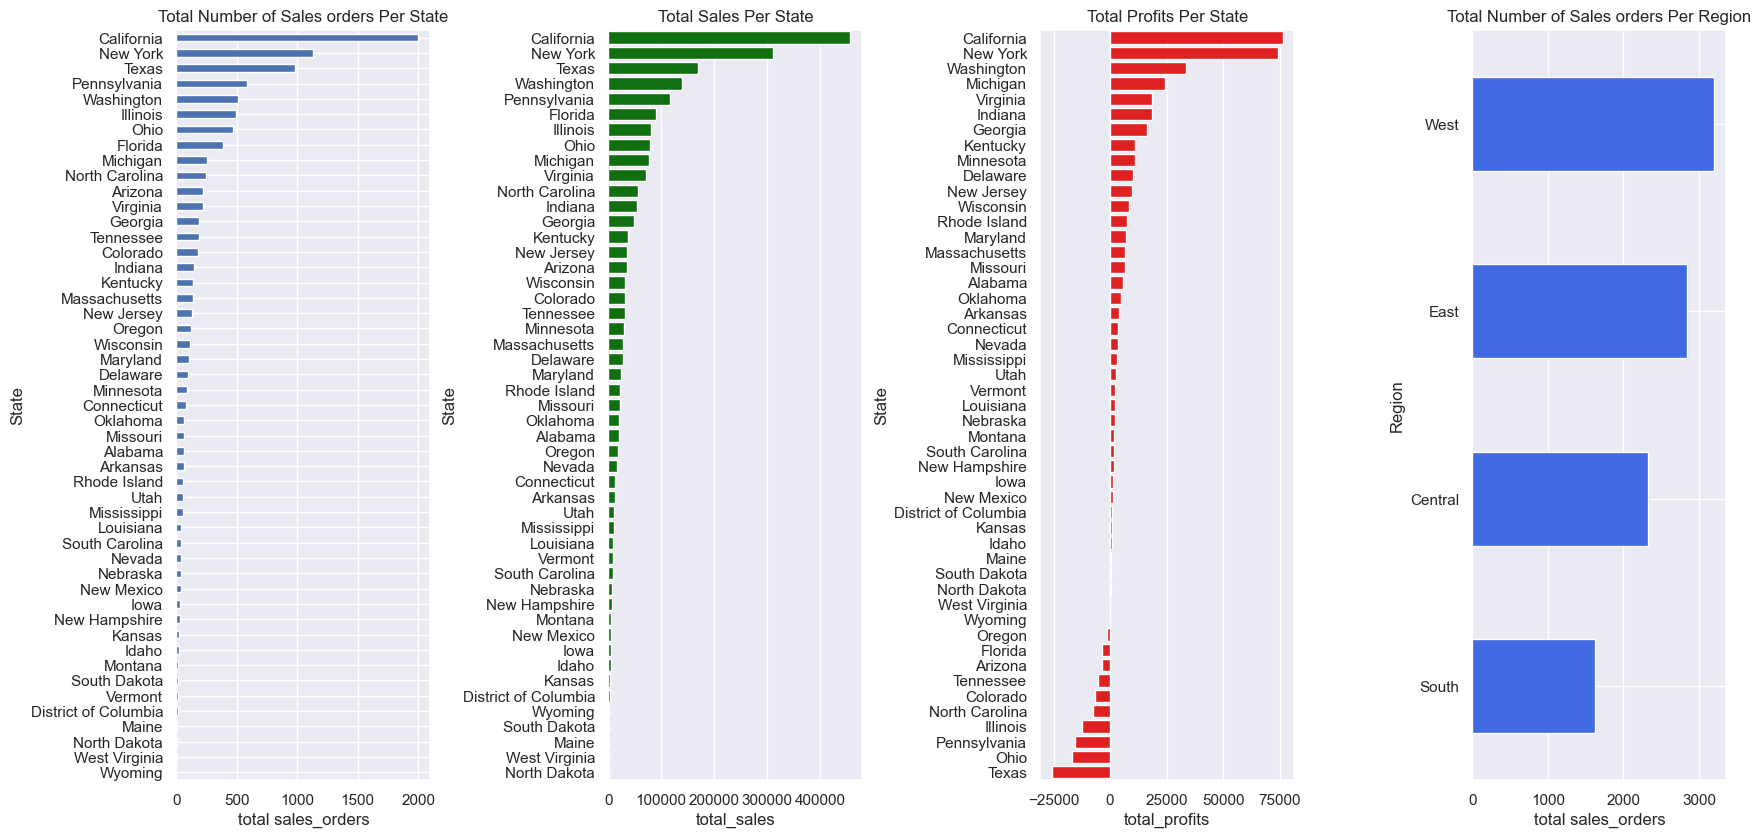

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(20,15))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('total sales_orders')
ax[0].set_title('Total Number of Sales orders Per State')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.7, hspace=0)
sns.barplot(y='State', x='total_sales', data=df_state_total_sales, color='green', ax=ax[1])
ax[1].set_ylabel('State')
ax[1].set_xlabel('total_sales')
ax[1].set_title('Total Sales Per State')

plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.7, hspace=0)
sns.barplot(y='State', x='total_profits', data=df_state_total_profits, color='red', ax=ax[2])
ax[2].set_ylabel('State')
ax[2].set_xlabel('total_profits')
ax[2].set_title('Total Profits Per State')

df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', color='royalblue', ax=ax[3])
ax[3].set_ylabel('Region')
ax[3].set_xlabel('total sales_orders')
ax[3].set_title('Total Number of Sales orders Per Region')

plt.savefig('images/total_profits.png')
plt.show();

#### Distribution of Profits

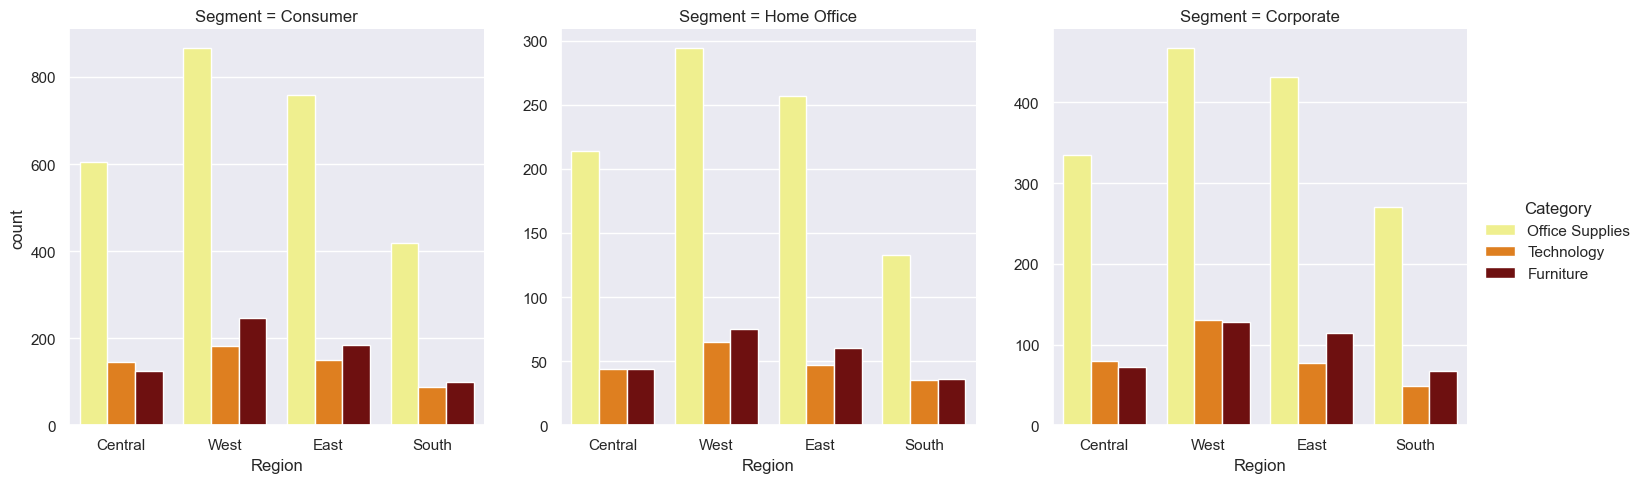

In [37]:
# total profit
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_cut, kind="count", 
                estimator=lambda : len(x) / len(df_cut) * 100, sharey=False, palette="afmhot_r")
plt.savefig('images/profit_total.png')
plt.show();

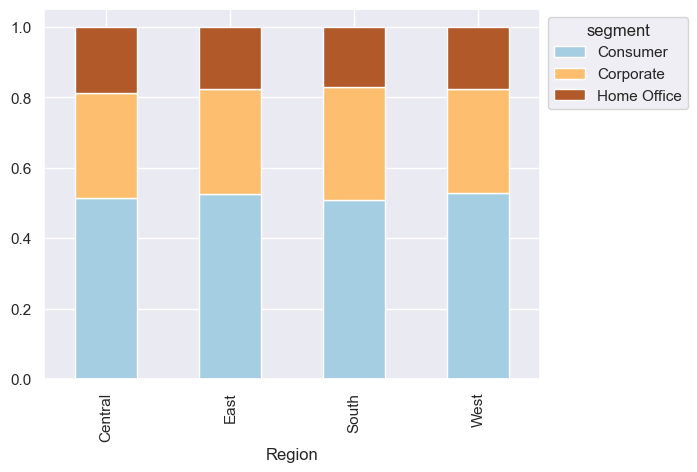

In [38]:
# positive profit
df_pos_profit = df_cut[df_cut['Profit']>0].sort_values('Profit')

by_pos_profit = df_pos_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_pos_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

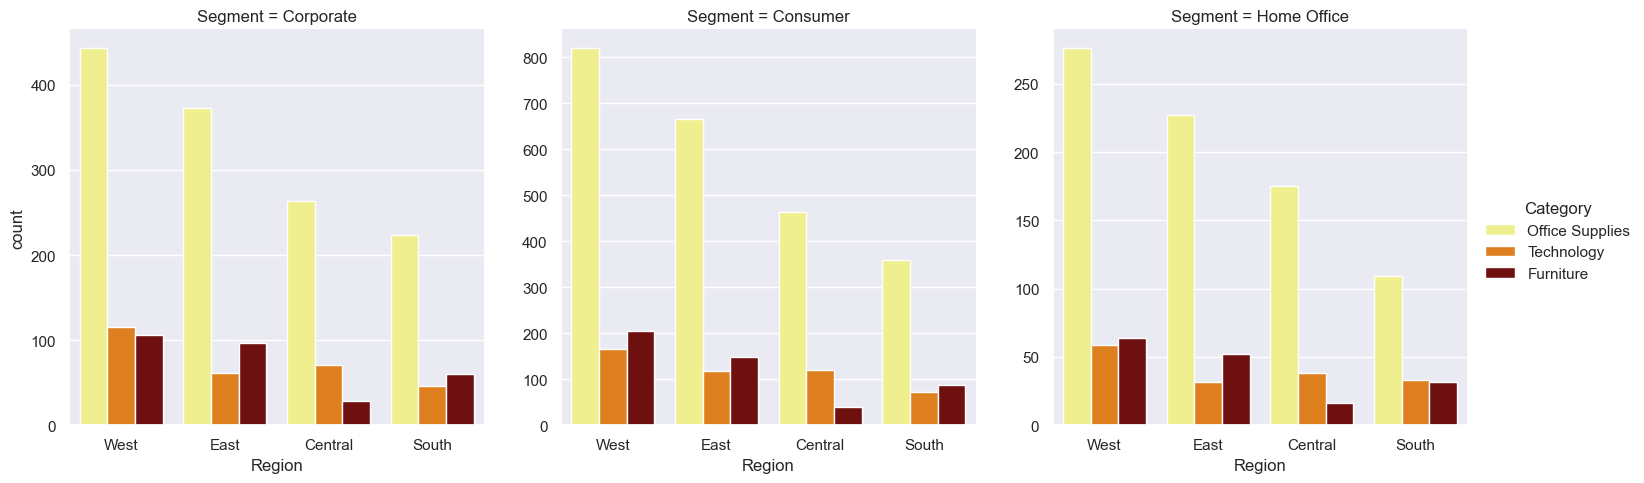

In [39]:
# 
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_pos_profit, kind="count", 
                estimator=lambda : len(x) / len(df_pos_profit) * 100, sharey=False, palette="afmhot_r")
plt.savefig('images/profit_pos.png')
plt.show();

- positive profit came from 'office supplies' across all the region.

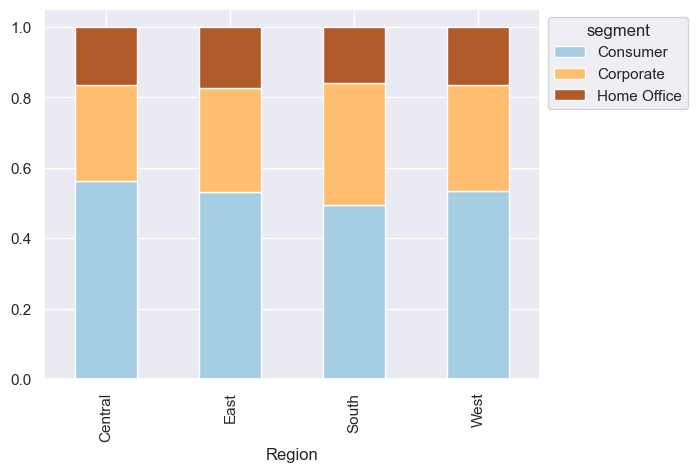

In [40]:
# negative profit
df_neg_profit = df_cut[df_cut['Profit']<0].sort_values('Profit')

by_neg_profit = df_neg_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_neg_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

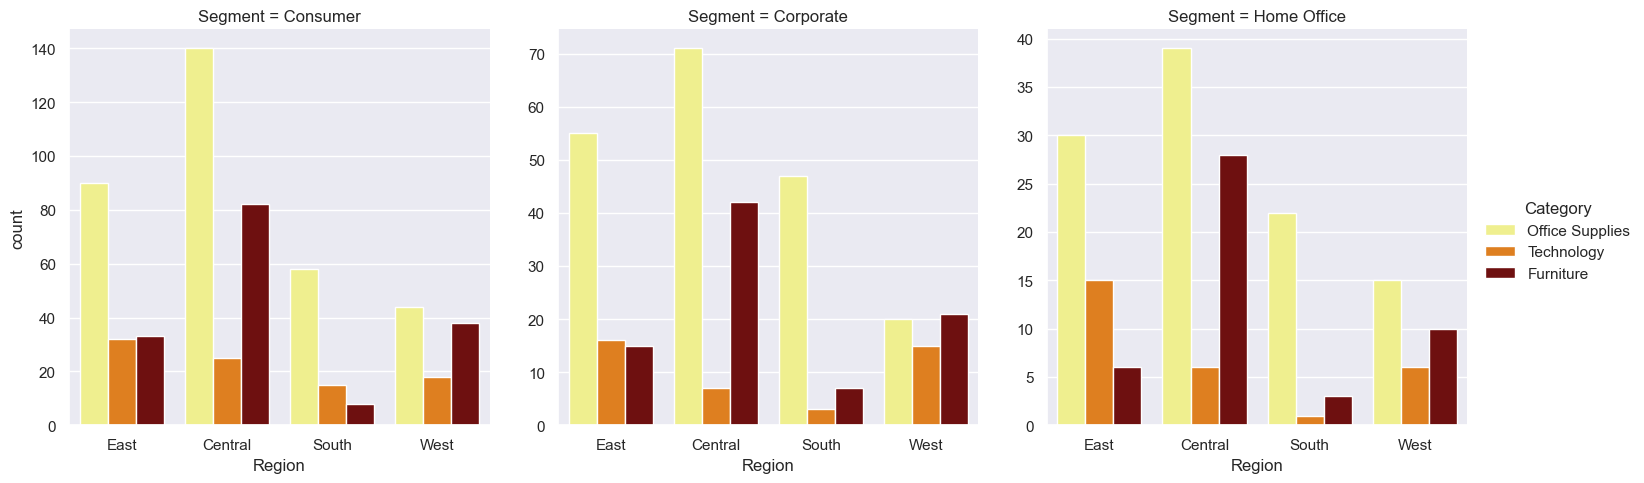

In [41]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_neg_profit, kind="count", 
                estimator=lambda : len(x) / len(df_neg_profit) * 100, sharey=False, palette="afmhot_r")
plt.savefig('images/profit_neg.png')
plt.show();

- Most negative profit came from in the central region. Need to break down this region ...

In [42]:
# break down the Central region
df_Central = df_neg_profit[df_neg_profit['Region'] == 'Central'].groupby('State').Category.value_counts(normalize=True).unstack()
df_Central.head()
# neg profit mainly came from 'Texas' and 'Illinois'

Category,Furniture,Office Supplies,Technology
State,,,
Illinois,0.383562,0.541096,0.075342
Texas,0.326531,0.581633,0.091837


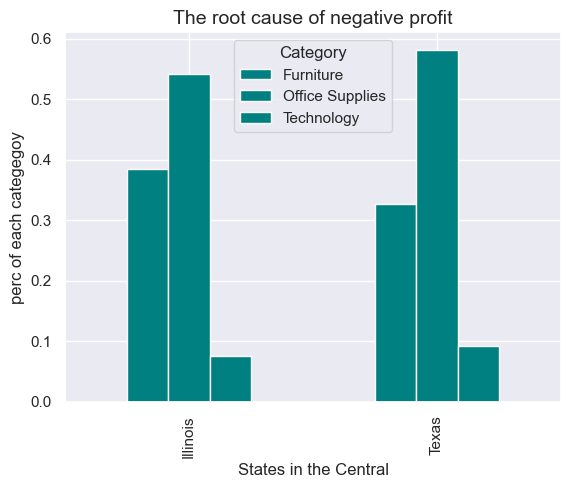

In [43]:
plt.figsize=(10,6)
df_Central.plot(kind='bar', color='teal')
plt.xlabel('States in the Central')
plt.ylabel('perc of each categegoy')
plt.title('The root cause of negative profit', fontsize=14)
plt.savefig('images/profit_2states.png')
plt.show();

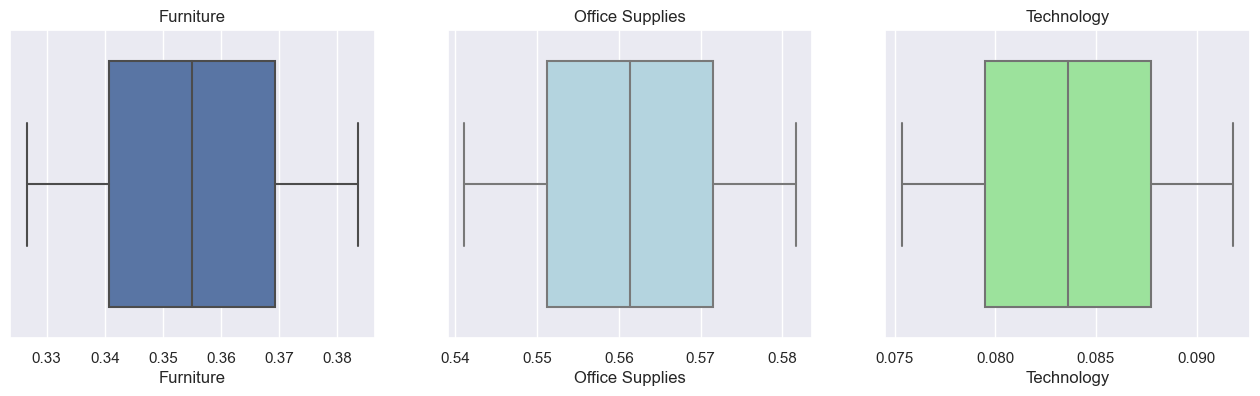

In [44]:
# continue breaking down into granulars
f, axs = plt.subplots(1,3, figsize=(16,4))

_ = plt.subplot(1,3,1)
_= sns.boxplot(df_Central['Furniture'])
_ = plt.title('Furniture')

_ = plt.subplot(1,3,2)
_= sns.boxplot(df_Central['Office Supplies'], color="lightblue")
_ = plt.title('Office Supplies')

_ = plt.subplot(1,3,3)
_ = sns.boxplot(df_Central['Technology'], color="lightgreen")
_ = plt.title('Technology')
plt.show();

In [45]:
# find the number of orders in category
(df_cut['Category'] + ',' + df['State']).value_counts().head()

Office Supplies,California      1027
Office Supplies,New York         585
Office Supplies,Texas            503
Furniture,California             298
Office Supplies,Pennsylvania     295
dtype: int64

In [46]:
# find the number of orders in ship mode
(df_cut['Ship Mode'] + ',' + df['State']).value_counts().head()

Standard Class,California      897
Standard Class,New York        504
Standard Class,Texas           452
Second Class,California        312
Standard Class,Pennsylvania    279
dtype: int64

### 5.2 Numeric features summary

In [47]:
# statistic summary
df_cut.describe()

,Sales,Quantity,Discount,Profit,Waiting_Days,Sale_Year
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.00000
mean,62.314599,3.464962,0.148635,9.636050,3.976055,2015.72822
std,82.271335,2.041211,0.199668,13.843595,1.746975,1.12324
min,0.444000,1.000000,0.000000,-27.735000,0.000000,2014.00000
25%,12.960000,2.000000,0.000000,2.133200,3.000000,2015.00000
50%,30.560000,3.000000,0.200000,6.797800,4.000000,2016.00000
75%,75.850000,5.000000,0.200000,16.016250,5.000000,2017.00000
max,496.860000,14.000000,0.800000,50.584800,7.000000,2017.00000


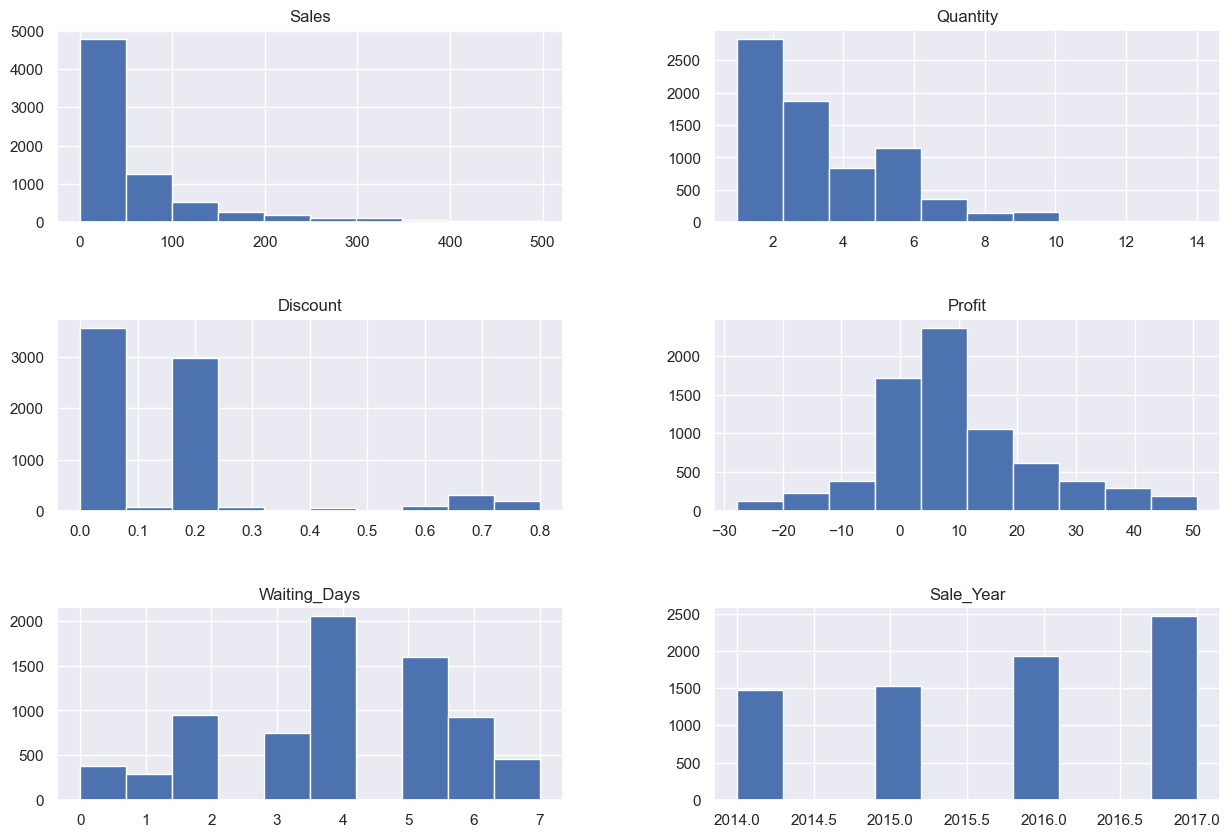

In [48]:
# plot histograms of each of the numeric features
df_cut.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show();

 - 'Sales' has a right tailed distribution with a range from 0.44 to 496.86.
 - The most often waiting days is 4 days between order and shipping date.
 - Records from year 2014 to 2017 are different. some are missing.

In [49]:
df_cut[df_cut['Waiting_Days'] == 7].value_counts()

Ship Mode       Segment      State       Region  Category         Sales    Quantity  Discount  Profit   Waiting_Days  Sale_Year
Standard Class  Consumer     Alabama     South   Technology       44.950   1         0.0       12.5860  7             2014         1
                Corporate    New York    East    Office Supplies  19.440   3         0.0       9.3312   7             2017         1
                                                 Furniture        82.260   3         0.0       33.7266  7             2016         1
                                                                  10.020   3         0.0       4.4088   7             2015         1
                                                                  9.820    2         0.0       3.2406   7             2017         1
                                                                                                                                  ..
                Consumer     New York    East    Office Supplies  26.336  

#### Summary of Sales, Profit, Waiting_Days per state

In [50]:
# average sales per state
State_sales_mean = df_cut.groupby('State')['Sales', 'Profit'].mean()
State_sales_mean.sort_values('Sales', ascending=False, inplace=True)
State_sales_mean.head()

,Sales,Profit
State,,
Idaho,116.145647,14.620565
South Carolina,84.678750,16.437694
Oregon,76.357070,7.575691
California,74.152678,12.952794
Wisconsin,73.609718,16.545917


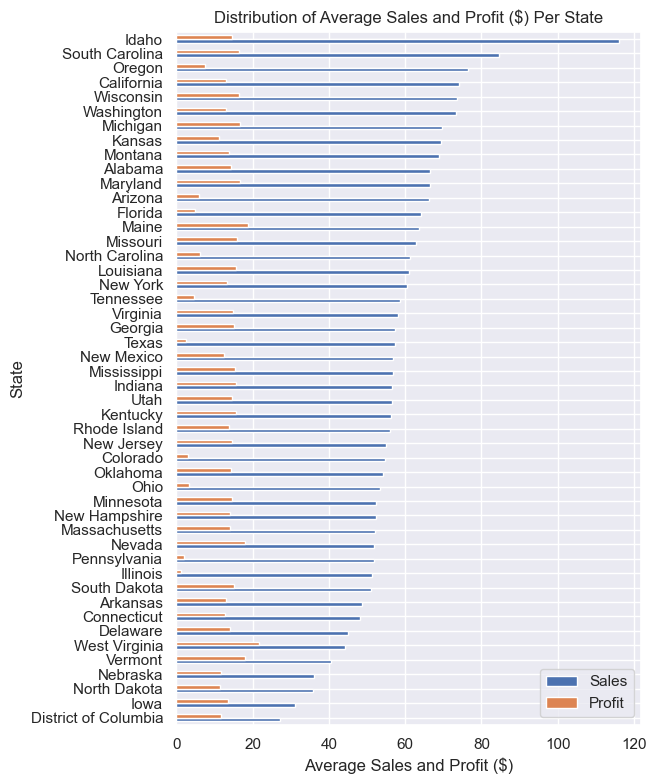

In [51]:
# plot barplot
State_sales_mean.reindex(index=State_sales_mean.Sales.sort_values(ascending=True).index).plot(kind='barh', figsize=(6,9))
plt.xlabel('Average Sales and Profits ($)')
plt.title('Distribution of Average Sales and Profits ($) Per State')
plt.savefig('images/barh_sales.png')
plt.show();

In [52]:
# distribution of sales per state
sales_bystate = pd.melt(df_cut[['State', 'Sales', 'Profit','Quantity', 'Discount']], 
                        id_vars= 'State', 
                        var_name= 'Sales_profit',
                        value_vars =['Sales', 'Profit'], 
                        value_name= 'Amount')

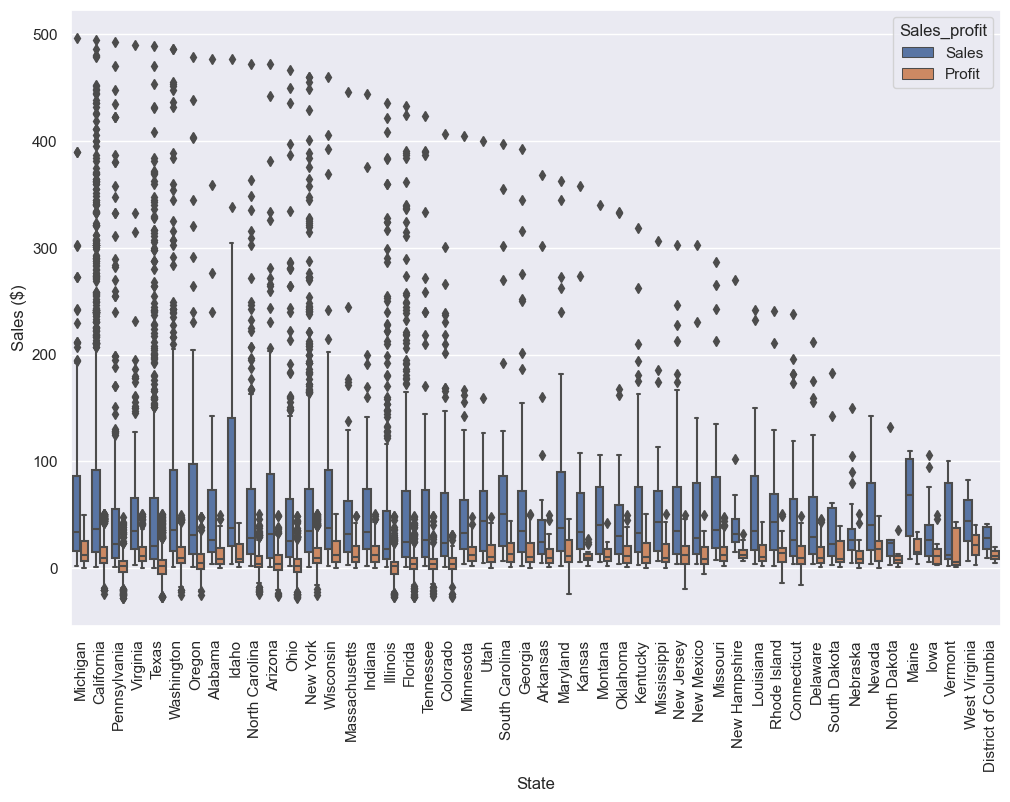

In [53]:
# plot boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='Sales_profit', data=sales_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.savefig('images/hist_sales.png')
plt.show();

 - Looking at the distribution of sales across the states, we can see:
     - Idaho had the most average sales but had very few number of orders.
     - Customers in District of Columbia experienced the longest waiting time between order and shipping date.
     
- Question of interest:
     - What products had the customers in Idaho ordered most?
     - When had the worst delay happened in District of Columbia and what was the cause?
     

- Aside from some relatively high sales in Idaho, New Hampshire, and South Carolina. What shall we do with the state information?

In [54]:
discount_bystate = pd.melt(df_cut[['State', 'Sales', 'Profit','Quantity', 'Discount']], 
                        id_vars= 'State', 
                        var_name= 'profit_discount',
                        value_vars =['Profit', 'Discount'], 
                        value_name= 'Amount')

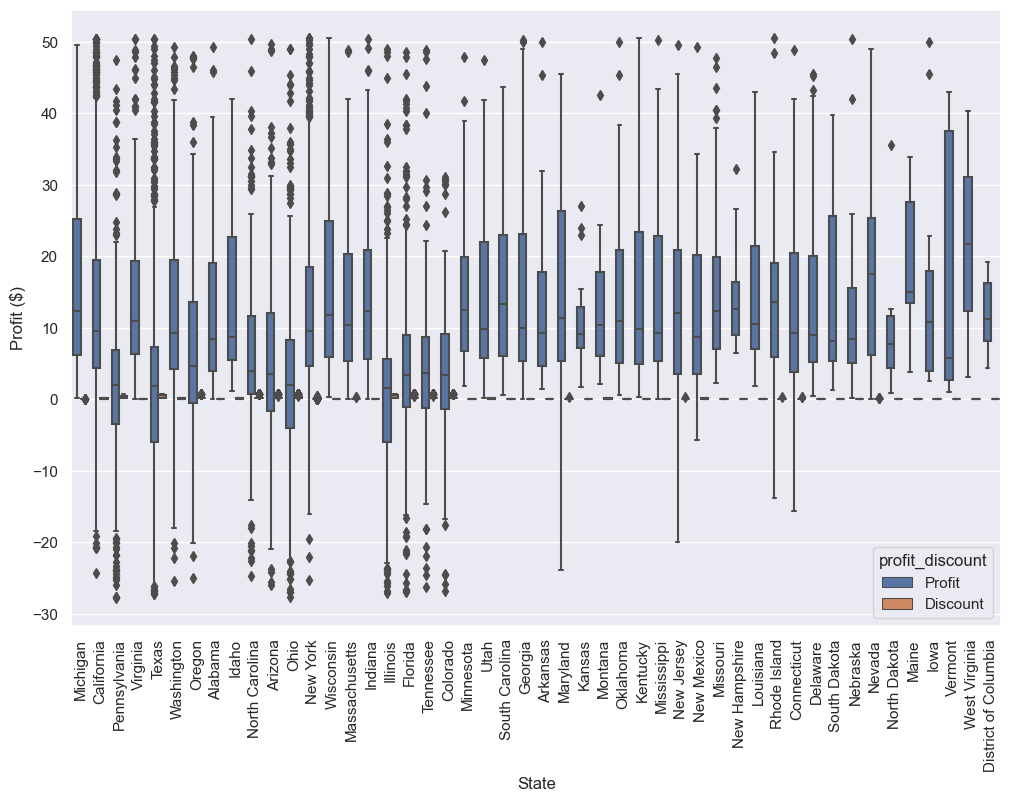

In [55]:
# plot boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='profit_discount', data=discount_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('Profit ($)')
plt.xlabel('State')
plt.show();

In [56]:
state_sales_summary = df_cut.groupby('State').agg(
                           avg_sales_state = pd.NamedAgg(column='Sales', aggfunc=np.mean),
                           avg_profit_state = pd.NamedAgg(column='Profit', aggfunc=np.mean),                                            
                           total_quantity_state = pd.NamedAgg(column='Quantity', aggfunc='sum'),
                            avg_discount_state = pd.NamedAgg(column='Discount', aggfunc=np.mean),                      
                            avg_wating_days_state = pd.NamedAgg(column='Waiting_Days', aggfunc=np.mean)).reset_index()

state_sales_summary.head()

,State,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state
0,Alabama,66.611429,14.281307,156,0.000000,4.261905
1,Arizona,66.156417,5.874764,586,0.282143,4.130952
2,Arkansas,48.697368,12.927255,141,0.000000,4.184211
3,California,74.152678,12.952794,5379,0.065100,3.878159
4,Colorado,54.639008,3.092148,465,0.294697,3.704545


#### Population data

In [57]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [58]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [59]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [60]:
usa_states_sub = usa_states.iloc[:, [0,5]].copy()
usa_states_sub.columns = ['State', 'state_population']
usa_states_sub.head()

,State,state_population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [61]:
# Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

{'District of Columbia',
 'Kentucky',
 'Massachusetts',
 'Pennsylvania',
 'Rhode Island',
 'Virginia'}

In [62]:
usa_states_sub.State[usa_states_sub.State.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia|Washington|Kentucky')]

16         Kentucky[C]
20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
46          Washington
47       West Virginia
Name: State, dtype: object

In [63]:
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' empty string; regex=True;  used a regex
usa_states_sub.State.replace(to_replace=r'\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.State[usa_states_sub.State.str.contains('Kentucky|Massachusetts|Pennsylvania|Rhode Island|Virginia')]

16         Kentucky
20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: State, dtype: object

In [64]:
state_sales_summary['State'].replace(to_replace ='District of Columbia', value='Maryland', inplace=True)

In [65]:
# verify no state missing in summary
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

set()

In [66]:
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_sales_summary.merge(usa_states_sub, how='left', on='State')
state_summary.head()

,State,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population
0,Alabama,66.611429,14.281307,156,0.000000,4.261905,4903185
1,Arizona,66.156417,5.874764,586,0.282143,4.130952,7278717
2,Arkansas,48.697368,12.927255,141,0.000000,4.184211,3017804
3,California,74.152678,12.952794,5379,0.065100,3.878159,39512223
4,Colorado,54.639008,3.092148,465,0.294697,3.704545,5758736


 - Create a new data frame of summary statistics for various states by adding information of population per state.

In [67]:
# order density
state_summary['avg_items_per_100kcapita'] = round(100_000 * state_summary.total_quantity_state / state_summary.state_population)

In [68]:
# target feature
# for Texas only
state_summary[state_summary['State'] == 'Texas']

,State,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population,avg_items_per_100kcapita
41,Texas,57.297444,2.475336,2569,0.349197,3.945578,28995881,9.0


### save the data

In [69]:
df_cut.shape

(7392, 11)

In [70]:
# save the data to a new csv file
datapath = './data'
save_file(df_cut, 'clean_data.csv', datapath)

# save the state_summary separately.
datapath = './data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\clean_data.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\state_summary.csv"


In [71]:
state_summary_newind= state_summary.set_index('State')
state_summary_newind.head()

,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population,avg_items_per_100kcapita
State,,,,,,,
Alabama,66.611429,14.281307,156,0.000000,4.261905,4903185,3.0
Arizona,66.156417,5.874764,586,0.282143,4.130952,7278717,8.0
Arkansas,48.697368,12.927255,141,0.000000,4.184211,3017804,5.0
California,74.152678,12.952794,5379,0.065100,3.878159,39512223,14.0
Colorado,54.639008,3.092148,465,0.294697,3.704545,5758736,8.0


#### Total state population

In [72]:
state_summary_newind.state_population.sort_values(ascending=False).head()

State
California      39512223
Texas           28995881
Florida         21477737
New York        19453561
Pennsylvania    12801989
Name: state_population, dtype: int64

 - California is the most densely populated state; Texas is in the second. 

#### Average sales per state

In [73]:
state_summary_newind.avg_sales_state.sort_values(ascending=False).head()

State
Idaho             116.145647
South Carolina     84.678750
Oregon             76.357070
California         74.152678
Wisconsin          73.609718
Name: avg_sales_state, dtype: float64

 - Idaho has the highest amount of average sales.

#### Average profit per state

In [74]:
state_summary_newind.avg_profit_state.sort_values(ascending=False).head()

State
West Virginia    21.716800
Maine            18.746760
Nevada           18.076174
Vermont          18.003560
Michigan         16.744005
Name: avg_profit_state, dtype: float64

 - West Virginia has the highest average profit.

#### Total sold items per state

In [75]:
state_summary_newind.total_quantity_state.sort_values(ascending=False).head()

State
California      5379
New York        2819
Texas           2569
Pennsylvania    1468
Washington      1323
Name: total_quantity_state, dtype: int64

 - California has the highest amount of sold items.

#### Average waiting days per state

In [76]:
state_summary_newind.avg_wating_days_state.sort_values(ascending=False).head()

State
Maryland      5.625000
Maine         5.400000
Minnesota     4.676923
Oklahoma      4.625000
New Mexico    4.586207
Name: avg_wating_days_state, dtype: float64

 - Maryland has the longest waiting time between order and shipping date.

In [77]:
state_summary_newind.head()

,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population,avg_items_per_100kcapita
State,,,,,,,
Alabama,66.611429,14.281307,156,0.000000,4.261905,4903185,3.0
Arizona,66.156417,5.874764,586,0.282143,4.130952,7278717,8.0
Arkansas,48.697368,12.927255,141,0.000000,4.184211,3017804,5.0
California,74.152678,12.952794,5379,0.065100,3.878159,39512223,14.0
Colorado,54.639008,3.092148,465,0.294697,3.704545,5758736,8.0


In [78]:
state_summary.reset_index(inplace=True)

In [79]:
state_summary.head()

,index,State,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population,avg_items_per_100kcapita
0,0,Alabama,66.611429,14.281307,156,0.000000,4.261905,4903185,3.0
1,1,Arizona,66.156417,5.874764,586,0.282143,4.130952,7278717,8.0
2,2,Arkansas,48.697368,12.927255,141,0.000000,4.184211,3017804,5.0
3,3,California,74.152678,12.952794,5379,0.065100,3.878159,39512223,14.0
4,4,Colorado,54.639008,3.092148,465,0.294697,3.704545,5758736,8.0


### 5.3 Categorical features summary

In [80]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_cut.columns if df_cut.dtypes[i] == "object"]
categorical_features.remove("State")
categorical_features

['Ship Mode', 'Segment', 'Region', 'Category']

In [81]:
df_cat = df_cut[categorical_features]

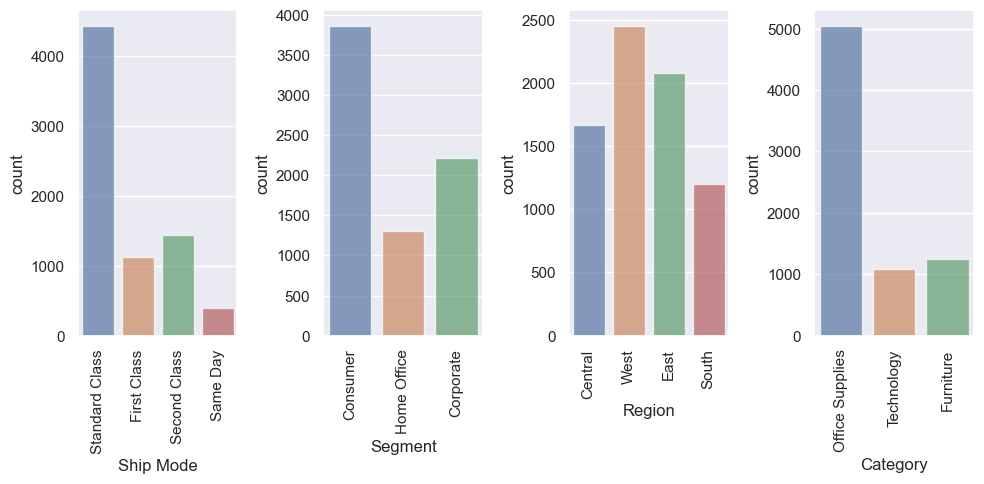

In [82]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# plot barplot of each feature
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)
        
fig.tight_layout()     
plt.show();

 - Ship mode: standard class is the most often used shipping method
 - Segment: the total number of orders from consumers is dominant
 - Region: West and East regions have higher amount of sales than Central and South
 - Category: Office supplies have high demand

In [83]:
df_cat.head()

,Ship Mode,Segment,Region,Category
8532,Standard Class,Consumer,Central,Office Supplies
3287,First Class,Consumer,West,Technology
2447,Standard Class,Consumer,East,Furniture
2579,Standard Class,Home Office,South,Office Supplies
8893,Standard Class,Consumer,Central,Furniture


In [84]:
df_cat_sales = df_cut[['Ship Mode', 'Segment', 'Region', 'Category', 'Sales','Profit']]

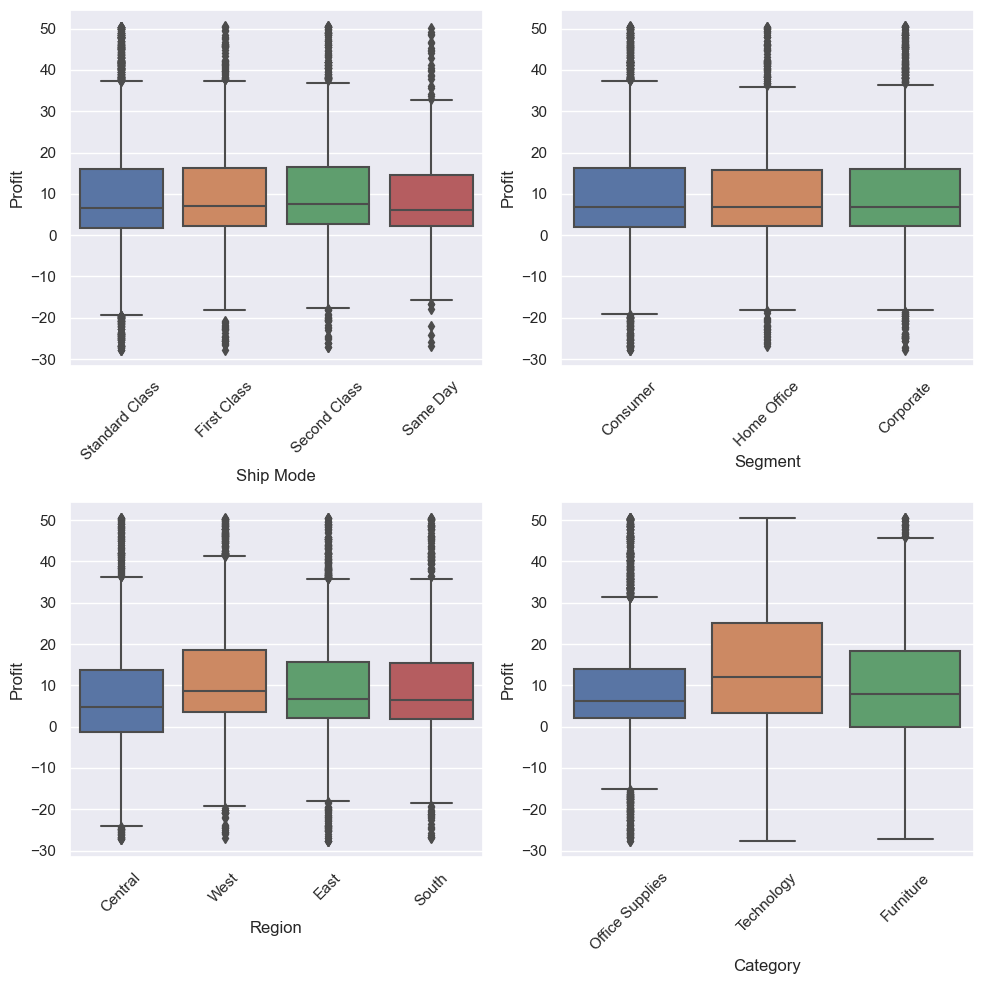

In [85]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot the variation of Sales in each feature
for i, ax in enumerate(fig.axes):

    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x=df_cat.columns[i], y="Profit", data=df_cat_sales, ax=ax)

fig.tight_layout()
plt.show();

This exploratory data analysis is to visualize the impact of each feature on 'Profit'. 
 - West region seems to have generated larger amount of profit compare to other regions. 
 - Product of 'Technology' seems to have generated larger amount of profit. 

#### Ship mode vs Profit

In [86]:
pivot_shipmode = pd.pivot_table(data=df_cut, index=['State'], columns='Ship Mode', values ='Profit', fill_value=0)
pivot_shipmode.head()

Ship Mode,First Class,Same Day,Second Class,Standard Class
State,,,,
Alabama,17.058800,7.250000,10.967740,15.144829
Arizona,7.899203,5.617725,9.002014,4.658916
Arkansas,15.607843,4.388400,12.112600,12.704867
California,13.471279,10.441607,12.915434,13.080089
Colorado,3.802355,-2.631675,6.876487,1.927812


In [87]:
# fill in NaN values
#cols = ['First Class', 'Same Day', 'Second Class', 'Standard Class']
# for col in cols:
#   pivot_segment.loc[pivot_segment[col].isnull(), col] = 0

In [88]:
df_shipmode = pivot_shipmode.reset_index()[['State', 'Same Day','First Class', 'Second Class', 'Standard Class']]
df_shipmode.head()

Ship Mode,State,Same Day,First Class,Second Class,Standard Class
0,Alabama,7.250000,17.058800,10.967740,15.144829
1,Arizona,5.617725,7.899203,9.002014,4.658916
2,Arkansas,4.388400,15.607843,12.112600,12.704867
3,California,10.441607,13.471279,12.915434,13.080089
4,Colorado,-2.631675,3.802355,6.876487,1.927812


#### Segment vs Profit

In [89]:
pivot_segment = pd.pivot_table(data=df_cut, index=['State'], columns='Segment', values ='Profit', fill_value=0)
pivot_segment.head()

Segment,Consumer,Corporate,Home Office
State,,,
Alabama,11.099613,15.623279,17.911257
Arizona,5.231117,6.772721,6.153705
Arkansas,14.291123,10.182125,11.921750
California,13.354759,12.618759,12.276547
Colorado,3.653184,2.439858,2.543461


In [90]:
df_seg = pivot_segment.reset_index()[['State', 'Consumer', 'Corporate', 'Home Office']]
df_seg.head()

Segment,State,Consumer,Corporate,Home Office
0,Alabama,11.099613,15.623279,17.911257
1,Arizona,5.231117,6.772721,6.153705
2,Arkansas,14.291123,10.182125,11.921750
3,California,13.354759,12.618759,12.276547
4,Colorado,3.653184,2.439858,2.543461


#### Category vs Profit

In [91]:
pivot_category = pd.pivot_table(data=df_cut, index=['State'], columns='Category', values ='Profit', fill_value=0)
pivot_category.head()

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,17.856520,13.587523,14.700943
Arizona,10.157596,3.323998,10.501103
Arkansas,20.376960,11.899367,11.344667
California,10.620660,12.408968,18.702732
Colorado,4.168668,1.513767,7.192720


In [92]:
df_category = pivot_category.reset_index()[['State', 'Furniture', 'Office Supplies', 'Technology']]
df_category.head()

Category,State,Furniture,Office Supplies,Technology
0,Alabama,17.856520,13.587523,14.700943
1,Arizona,10.157596,3.323998,10.501103
2,Arkansas,20.376960,11.899367,11.344667
3,California,10.620660,12.408968,18.702732
4,Colorado,4.168668,1.513767,7.192720


In [93]:
state_summary = state_sales_summary.merge(usa_states_sub, how='left', on='State')
state_summary.head()

,State,avg_sales_state,avg_profit_state,total_quantity_state,avg_discount_state,avg_wating_days_state,state_population
0,Alabama,66.611429,14.281307,156,0.000000,4.261905,4903185
1,Arizona,66.156417,5.874764,586,0.282143,4.130952,7278717
2,Arkansas,48.697368,12.927255,141,0.000000,4.184211,3017804
3,California,74.152678,12.952794,5379,0.065100,3.878159,39512223
4,Colorado,54.639008,3.092148,465,0.294697,3.704545,5758736


In [94]:
cat = df_shipmode.merge(df_seg, how='left', on='State')

In [95]:
cat_all = cat.merge(df_category, how='left', on='State')
cat_all.head()

,State,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,Alabama,7.250000,17.058800,10.967740,15.144829,11.099613,15.623279,17.911257,17.856520,13.587523,14.700943
1,Arizona,5.617725,7.899203,9.002014,4.658916,5.231117,6.772721,6.153705,10.157596,3.323998,10.501103
2,Arkansas,4.388400,15.607843,12.112600,12.704867,14.291123,10.182125,11.921750,20.376960,11.899367,11.344667
3,California,10.441607,13.471279,12.915434,13.080089,13.354759,12.618759,12.276547,10.620660,12.408968,18.702732
4,Colorado,-2.631675,3.802355,6.876487,1.927812,3.653184,2.439858,2.543461,4.168668,1.513767,7.192720


In [96]:
# merge numeric and categorical features
df_combined = state_summary.merge(cat_all, how='left', on='State')

In [97]:
df_all = df_combined.drop(['total_quantity_state', 'state_population'], axis=1)
df_all.head()

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,Alabama,66.611429,14.281307,0.000000,4.261905,7.250000,17.058800,10.967740,15.144829,11.099613,15.623279,17.911257,17.856520,13.587523,14.700943
1,Arizona,66.156417,5.874764,0.282143,4.130952,5.617725,7.899203,9.002014,4.658916,5.231117,6.772721,6.153705,10.157596,3.323998,10.501103
2,Arkansas,48.697368,12.927255,0.000000,4.184211,4.388400,15.607843,12.112600,12.704867,14.291123,10.182125,11.921750,20.376960,11.899367,11.344667
3,California,74.152678,12.952794,0.065100,3.878159,10.441607,13.471279,12.915434,13.080089,13.354759,12.618759,12.276547,10.620660,12.408968,18.702732
4,Colorado,54.639008,3.092148,0.294697,3.704545,-2.631675,3.802355,6.876487,1.927812,3.653184,2.439858,2.543461,4.168668,1.513767,7.192720


### 5.4 PCA

To Transform the original features into uncorrelated features in new dimensions and view the data from the most informative view point. use derived features to visualize the data in a lower dimension and know how much variance the derived new features can explain. 

The basic steps in this process are:

1. scale the data (important here because our features are heterogeneous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to derive the new features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

- **Scale the data**

In [98]:
df_all_state = df_all.set_index('State')
#Save the state labels 
state_index = df_all_state.index
#Save the column names
all_columns = df_all_state.columns
df_all_state.head()

,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
State,,,,,,,,,,,,,,
Alabama,66.611429,14.281307,0.000000,4.261905,7.250000,17.058800,10.967740,15.144829,11.099613,15.623279,17.911257,17.856520,13.587523,14.700943
Arizona,66.156417,5.874764,0.282143,4.130952,5.617725,7.899203,9.002014,4.658916,5.231117,6.772721,6.153705,10.157596,3.323998,10.501103
Arkansas,48.697368,12.927255,0.000000,4.184211,4.388400,15.607843,12.112600,12.704867,14.291123,10.182125,11.921750,20.376960,11.899367,11.344667
California,74.152678,12.952794,0.065100,3.878159,10.441607,13.471279,12.915434,13.080089,13.354759,12.618759,12.276547,10.620660,12.408968,18.702732
Colorado,54.639008,3.092148,0.294697,3.704545,-2.631675,3.802355,6.876487,1.927812,3.653184,2.439858,2.543461,4.168668,1.513767,7.192720


In [99]:
# scale() returns an ndarray, so you lose the column names
all_scaled = scale(df_all_state)

In [100]:
df_scaled = pd.DataFrame(all_scaled, columns=all_columns)
df_scaled.head()

,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,0.602502,0.369341,-0.622632,0.408482,-0.092081,0.859730,-0.068675,0.544141,-0.140975,0.639300,1.058582,0.415583,0.561621,-0.129094
1,0.570494,-1.381149,1.732190,0.152651,-0.285540,-0.386394,-0.366109,-1.532105,-1.217759,-0.800139,-0.891253,-0.404016,-1.710293,-0.610260
2,-0.657693,0.087388,-0.622632,0.256697,-0.431241,0.662334,0.104554,0.061020,0.444621,-0.245640,0.065301,0.683900,0.187934,-0.513615
3,1.133005,0.092706,-0.079290,-0.341209,0.286191,0.371663,0.226031,0.135316,0.272812,0.150650,0.124140,-0.354720,0.300738,0.329381
4,-0.239718,-1.960572,1.836970,-0.680384,-1.263266,-0.943752,-0.687722,-2.072872,-1.507286,-1.504829,-1.489965,-1.041575,-2.111002,-0.989293


#### Calculate the PCA transformation

Fit the PCA transformation using the scaled data

In [101]:
model = PCA().fit(all_scaled)

Plot the cumulative variance ratio with number of components.

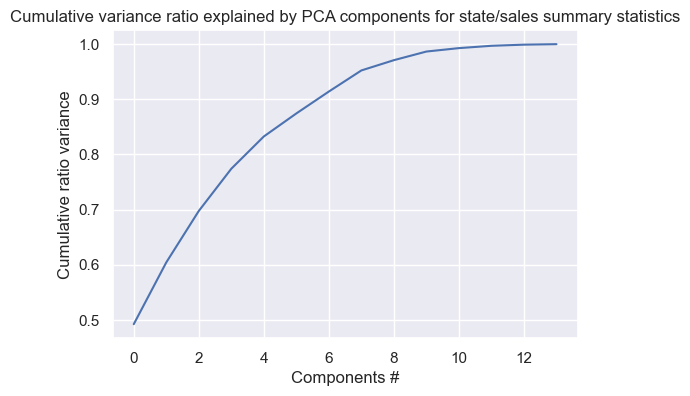

In [102]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
plt.subplots(figsize=(6, 4))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Components #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/sales summary statistics')
plt.savefig('images/pca1.png')
plt.show();

#### - **The first 2 components seem to account for over 60% of the variance, and the first 5 for over 85%.**

In [103]:
new_dim_x = model.transform(all_scaled)
new_dim_x.shape

(48, 14)

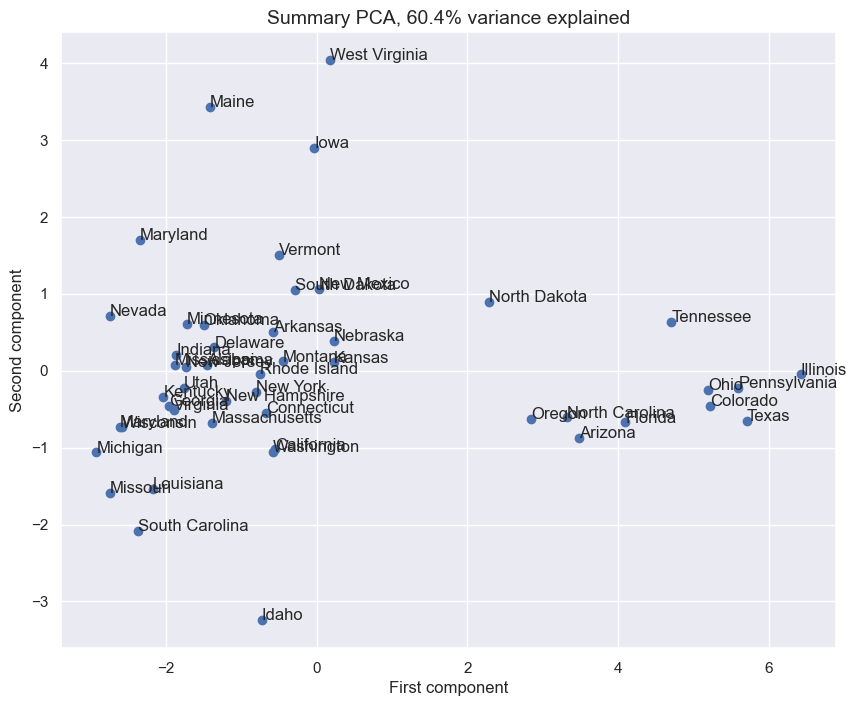

In [104]:
# extract the first and second columns from the transformed data as x and y coordinates for plotting.
# the second (index 1) value of the cumulative variance ratio
# visualizing the percentage variance explained by the two PCA components
x = new_dim_x[:, 0]
y = new_dim_x[:, 1]

pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Summary PCA, {pc_var:.1f}% variance explained', fontsize=14)
for s, x, y in zip(state_index, x, y):
    plt.annotate(s, (x, y))
    
plt.show();
# Plot the first two derived features (the first two principle components) and label each point with the name of the state.

In [105]:
State_sales_mean.reset_index(inplace=True)
#State_sales_profit_mean.head()
State_sales_mean['State'].replace(to_replace ='District of Columbia', value='Maryland', inplace=True)

state_avg_sales = State_sales_mean[['State', 'Sales', 'Profit']].sort_values('State')
state_avg_sales.set_index('State', inplace=True)
state_avg_sales.head()

,Sales,Profit
State,,
Alabama,66.611429,14.281307
Arizona,66.156417,5.874764
Arkansas,48.697368,12.927255
California,74.152678,12.952794
Colorado,54.639008,3.092148


In [106]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', new_dimantion_x[:, 0], 'PC2': new_dimantion_x[:, 1]}, index=state_index)
pca_df = pd.DataFrame({'PC1': new_dim_x[:, 0], 'PC2': new_dim_x[:, 1]}, index=state_index)

pca_df.sort_index(inplace=True)
pca_df.head()

,PC1,PC2
State,,
Alabama,-1.448316,0.076538
Arizona,3.486054,-0.878442
Arkansas,-0.584058,0.502993
California,-0.544978,-1.023015
Colorado,5.217825,-0.452561


In [107]:
#cast it to a dataframe using Series' to_frame() method:
# df_state_avg_sales = state_avg_sales.to_frame()

In [108]:
#Use pd.concat to concatenate `pca_df` and `state_avg_sales` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_sales], axis=1)

In [109]:
# seperate sales into quartiles to show something
pca_df['Sales_Quartile'] = pd.qcut(pca_df.Sales, q=4, precision=1)
pca_df['Profit_Quartile'] = pd.qcut(pca_df.Profit, q=4, precision=1)
pca_df.head()

,PC1,PC2,Sales,Profit,Sales_Quartile,Profit_Quartile
State,,,,,,
Alabama,-1.448316,0.076538,66.611429,14.281307,"(64.6, 116.1]","(14.1, 15.4]"
Arizona,3.486054,-0.878442,66.156417,5.874764,"(64.6, 116.1]","(1.0, 11.6]"
Arkansas,-0.584058,0.502993,48.697368,12.927255,"(27.099999999999998, 51.9]","(11.6, 14.1]"
California,-0.544978,-1.023015,74.152678,12.952794,"(64.6, 116.1]","(11.6, 14.1]"
Colorado,5.217825,-0.452561,54.639008,3.092148,"(51.9, 56.7]","(1.0, 11.6]"


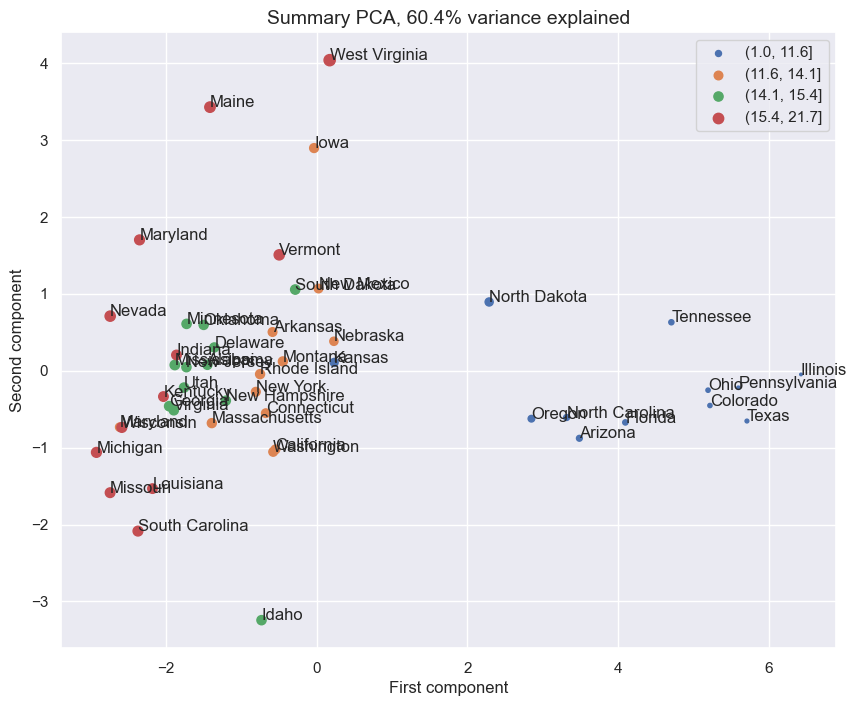

In [110]:
x = pca_df.PC1
y = pca_df.PC2

quartiles = pca_df.Profit_Quartile  # quartiles = pca_df.Sales_Quartile
state = pca_df.index
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]

#s = pca_df['Sales_Quatile']
s = state_avg_sales['Profit']

fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=s[im]*3, label=q) # s=s[im]*0.1

ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Summary PCA, {pc_var:.1f}% variance explained',fontsize=14)
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))
    
plt.savefig('images/pca2.png')
plt.show();

**Highlights:**
    - The red points represent the quartile of the largest average 'Profit' per state and the blue points represent the quartile of the lowest average 'profit' (x>0) . There's also a spread of the other quartiles as well.
    - In this representation, the two principal components account for ~ 60% of the variance in the data.

In [111]:
df_pca_components = pd.DataFrame(model.components_, columns=all_columns)
df_pca_components.head(7)

,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,-0.031122,-0.348789,0.349434,-0.057967,-0.182246,-0.220938,-0.241968,-0.343687,-0.303226,-0.286668,-0.279812,-0.281450,-0.338661,-0.216546
1,-0.534453,0.177783,-0.170704,0.399350,-0.266046,-0.403118,-0.217949,0.245891,-0.205994,0.006523,0.037887,0.016513,0.223022,-0.242820
2,0.257684,-0.063175,0.169426,0.603025,0.103233,-0.050665,-0.172905,-0.007791,-0.169483,0.421111,-0.269260,0.260875,-0.190368,0.333507
3,0.501055,0.224533,-0.005403,-0.222449,-0.549580,0.171196,-0.437853,0.194977,-0.211274,0.104561,0.053617,-0.019508,0.161678,-0.054527
4,-0.280111,0.076926,-0.067696,-0.218714,0.016491,-0.071849,-0.299417,0.107012,0.157943,0.126684,-0.212408,-0.510723,-0.000565,0.640089
5,0.128626,-0.007009,0.162792,0.296968,0.369951,0.123367,-0.259822,0.099778,-0.225004,-0.356801,0.595154,-0.286209,0.079198,0.137256
6,-0.066624,0.092190,-0.128886,-0.315423,0.633123,0.075270,-0.395288,0.099989,-0.281664,0.148439,-0.276912,0.140025,0.061220,-0.311117


 - For the row #0 associated with the 1st component, 'avg_profit_state' is negatively associated with 'avg_discount_state'. 

In [112]:
df_all[df_all.State.isin(['West Virginia'])]

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
46,West Virginia,44.32,21.7168,0.0,4.0,0.0,0.0,0.0,21.7168,0.0,0.0,21.7168,0.0,21.7168,0.0


In [113]:
# the state of highest profit
df_scaled[df_all.State.isin(['West Virginia'])]

,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
46,-0.965627,1.91763,-0.622632,-0.103179,-0.951357,-1.461046,-1.728202,1.845413,-2.177592,-1.901643,1.689681,-1.485355,2.361102,-1.813346


- In the state of West Virginia, the larger amount of average sales of 'Office Supplies' might lead to the higher 'Profit'. 

In [114]:
# Texas
df_all[df_all.State.isin(['Texas'])]

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
41,Texas,57.297444,2.475336,0.349197,3.945578,3.625472,4.379891,2.712296,1.853419,1.670706,4.364808,1.311129,-10.381845,2.151494,13.270474


In [115]:
df_scaled[df_all.State.isin(['Texas'])]

,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
41,-0.052706,-2.089011,2.29184,-0.209498,-0.521663,-0.865181,-1.317805,-2.087602,-1.871042,-1.191758,-1.694331,-2.590568,-1.969836,-0.29298


 - In the state of Texas, the larger number of 'Discount' (2.29184: about 2 standard deviation away from the mean) may lead to the lower profit. 
 - the products of 'Technology'  and the average number of discounts per state are negatively related to 'profit'. 

### 5.5 Feature engineering

- Add the ratios:
    - the ratios of Same Day, First Class, Second Class, Standard Class to the total shipping
    - the ratios of consumer, Corporate, Home Office to the total segment
    - the ratio of Furniture, Office supplies, Technology to the entire category

In [116]:
Total_ship = df_all['Same Day'] + df_all['First Class'] + df_all['Second Class'] + df_all['Standard Class']
Total_segment = df_all['Consumer'] + df_all['Corporate'] + df_all['Home Office']
Total_category = df_all['Furniture'] + df_all['Office Supplies'] + df_all['Technology']

In [117]:
df_all['Total_ship'] = df_all['Same Day'] + df_all['First Class'] + df_all['Second Class'] + df_all['Standard Class']
df_all['Total_segment'] = df_all['Consumer'] + df_all['Corporate'] + df_all['Home Office']
df_all['Total_category'] = df_all['Furniture'] + df_all['Office Supplies'] + df_all['Technology']

df_all['Same_day_ratio'] = df_all['Same Day'] / df_all['Total_ship']
df_all['First Class_ratio'] = df_all['First Class'] / df_all['Total_ship']
df_all['Second Class_ratio'] = df_all['Second Class'] / df_all['Total_ship']
df_all['Standard Class_ratio'] = df_all['Standard Class'] / df_all['Total_ship']

df_all['Consumer_ratio'] = df_all['Consumer'] / df_all['Total_segment']
df_all['Corporate_ratio'] = df_all['Corporate'] / df_all['Total_segment']
df_all['Home_Office_ratio'] = df_all['Home Office'] / df_all['Total_segment']

df_all['Furniture_ratio'] = df_all['Furniture'] / df_all['Total_category']
df_all['Office_Supplies_ratio'] = df_all['Office Supplies'] / df_all['Total_category']
df_all['Technology_ratio'] = df_all['Technology'] / df_all['Total_category']

In [118]:
df_all[df_all['Furniture_ratio'] < 0]

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,...,Same_day_ratio,First Class_ratio,Second Class_ratio,Standard Class_ratio,Consumer_ratio,Corporate_ratio,Home_Office_ratio,Furniture_ratio,Office_Supplies_ratio,Technology_ratio
11,Illinois,51.432012,1.109263,0.369477,4.063953,1.583220,1.037207,-0.248247,1.534092,1.487820,...,0.405302,0.265523,-0.063551,0.392725,0.451117,-0.117811,0.666694,-3.669277,0.539475,4.129802
41,Texas,57.297444,2.475336,0.349197,3.945578,3.625472,4.379891,2.712296,1.853419,1.670706,...,0.288398,0.348410,0.215757,0.147435,0.227411,0.594123,0.178466,-2.059840,0.426873,2.632966


In [119]:
df_all.head()

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same Day,First Class,Second Class,Standard Class,Consumer,...,Same_day_ratio,First Class_ratio,Second Class_ratio,Standard Class_ratio,Consumer_ratio,Corporate_ratio,Home_Office_ratio,Furniture_ratio,Office_Supplies_ratio,Technology_ratio
0,Alabama,66.611429,14.281307,0.000000,4.261905,7.250000,17.058800,10.967740,15.144829,11.099613,...,0.143788,0.338325,0.217522,0.300365,0.248680,0.350030,0.401290,0.386966,0.294453,0.318582
1,Arizona,66.156417,5.874764,0.282143,4.130952,5.617725,7.899203,9.002014,4.658916,5.231117,...,0.206702,0.290648,0.331226,0.171423,0.288096,0.372998,0.338906,0.423539,0.138600,0.437862
2,Arkansas,48.697368,12.927255,0.000000,4.184211,4.388400,15.607843,12.112600,12.704867,14.291123,...,0.097925,0.348283,0.270288,0.283504,0.392667,0.279767,0.327566,0.467137,0.272790,0.260074
3,California,74.152678,12.952794,0.065100,3.878159,10.441607,13.471279,12.915434,13.080089,13.354759,...,0.209215,0.269920,0.258783,0.262082,0.349143,0.329902,0.320955,0.254495,0.297346,0.448159
4,Colorado,54.639008,3.092148,0.294697,3.704545,-2.631675,3.802355,6.876487,1.927812,3.653184,...,-0.263828,0.381189,0.689374,0.193265,0.422993,0.282505,0.294501,0.323776,0.117573,0.558651


In [120]:
To_drop = ['Same Day', 'First Class', 'Second Class',
       'Standard Class', 'Consumer', 'Corporate', 'Home Office', 'Furniture',
       'Office Supplies', 'Technology', 'Total_ship', 'Total_segment',
       'Total_category']

df_all.drop(columns=To_drop, inplace=True)

### 5.6 Bivariate analysis

The analysis between a dependent variable and an independent variable to uncover the relationship between them.
#### Feature correlation heatmap

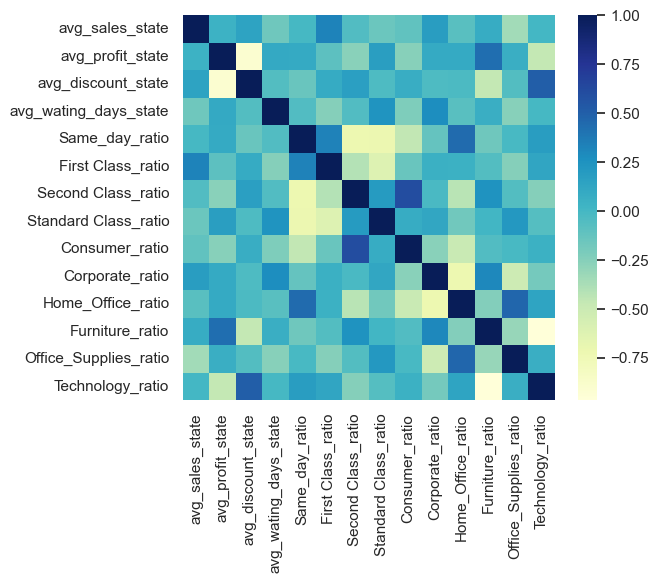

In [121]:
# find relations between two variables
plt.subplots(figsize=(6,5))
sns.heatmap(df_all.corr(), cmap="YlGnBu")
plt.savefig('images/heatmap.png')
plt.show();

From correlation table, we get a sense of the most important features to the profits. We can see 'the number of discounts' becomes the MOST important contributor to profit.
 
 **Questions of interests:**
 - 'avg_discount_state': negatively associated with the profit but positively related to 'Technology'.
     - looking into the number of discounts based on the category of products?
 - 'Furniture': positively correlated with profit and also positively related to 'Corporate'.
     - Was 'corporate' the major customer? 

#### Scatter plots of numeric features against sales
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset.

In [122]:
# define function to create scatterplots of profit against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'avg_profit_state', data=df_all,alpha=0.5)
        ax.set(xlabel=col, ylabel='Profit')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [123]:
features = [feature for feature in df_all.columns if feature not in ['State','avg_profit_state']]

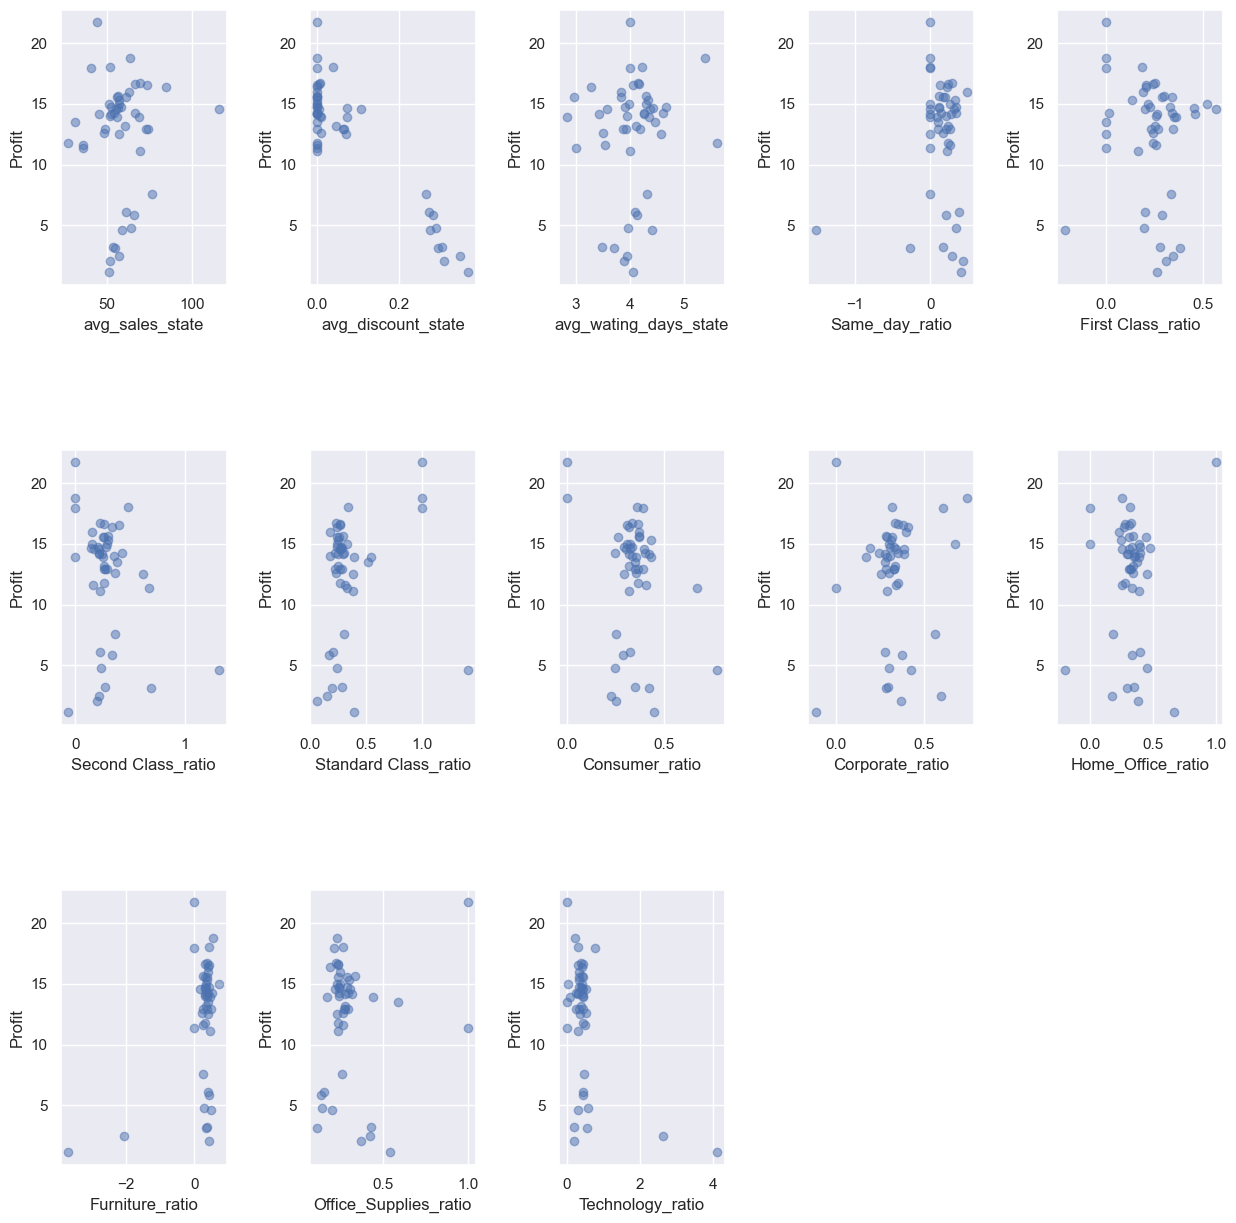

In [124]:
# in this case, the ‘total_sale_state’ attribute is the dependent variable, and every other are the independent variables.
scatterplots(features, ncol=5, figsize=(15, 15))
plt.show();

- There is a strong negative correlation with 'avg_discount_state' with 'Profit'.

In [125]:
# save the state_summary separately.
datapath = './data'
save_file(df_all, 'all_sales_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\all_sales_summary.csv"


## 6. Conclusions

EDA can uncover the important relationships between variables by visualization before statistical analysis. 

In this notebook, the thorough EDA includes:
 - Break down the sales data and identify the high profitable products across the states.
 - Think about ways to drive the growth of the profit:
     - What category of products are in high demand and more profitable on average?
     - what products/factor cause the low profits? Should the business reduce the number of discounts in 'Technology' category and increase the number of discounts in 'Home_office' and 'Office_supplies' category ?